In [1]:
import os
import numpy as np
from PIL import Image

sample_data_dir = '/mnt/hdd1/c-MET_datasets/Lung_c-MET IHC_scored/sample'
samsung_data_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/록원재단/AT2/C-MET_slide/patch/S-LC0001-MET/x200'

def get_img_list(data_dir):
    img_files = [i for i in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, i))]
    return sorted(img_files)

sample_data_list = get_img_list(sample_data_dir)
samsung_data_list = get_img_list(samsung_data_dir)

samsung_data_list = [data for data in samsung_data_list if int(data.split('_')[1]) < 50000]
samsung_data_list.sort()

In [2]:
samsung_data_list

['S-LC0001-MET_20480_34816.jpg',
 'S-LC0001-MET_20480_36864.jpg',
 'S-LC0001-MET_22528_30720.jpg',
 'S-LC0001-MET_22528_32768.jpg',
 'S-LC0001-MET_22528_34816.jpg',
 'S-LC0001-MET_22528_36864.jpg',
 'S-LC0001-MET_22528_38912.jpg',
 'S-LC0001-MET_24576_30720.jpg',
 'S-LC0001-MET_24576_32768.jpg',
 'S-LC0001-MET_24576_6144.jpg',
 'S-LC0001-MET_26624_12288.jpg',
 'S-LC0001-MET_26624_14336.jpg',
 'S-LC0001-MET_26624_16384.jpg',
 'S-LC0001-MET_26624_18432.jpg',
 'S-LC0001-MET_26624_20480.jpg',
 'S-LC0001-MET_26624_22528.jpg',
 'S-LC0001-MET_28672_14336.jpg',
 'S-LC0001-MET_28672_16384.jpg',
 'S-LC0001-MET_28672_18432.jpg']

In [3]:
def get_image(data_dir, data_list):
    imgs = []
    for file in data_list:
        imgs.append(np.array(Image.open(os.path.join(data_dir, file)).convert('RGB')))
    return imgs

sample_data = get_image(sample_data_dir, sample_data_list)
samsung_data = get_image(samsung_data_dir, samsung_data_list)

In [4]:
len(sample_data), len(samsung_data)

(20, 19)

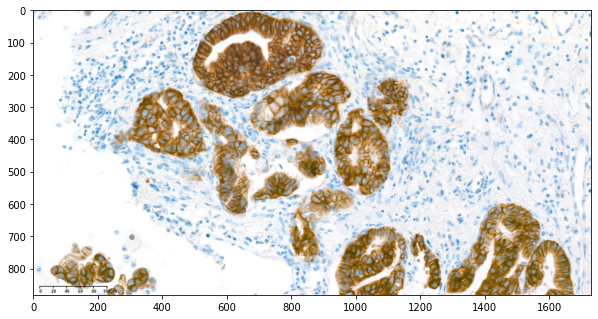

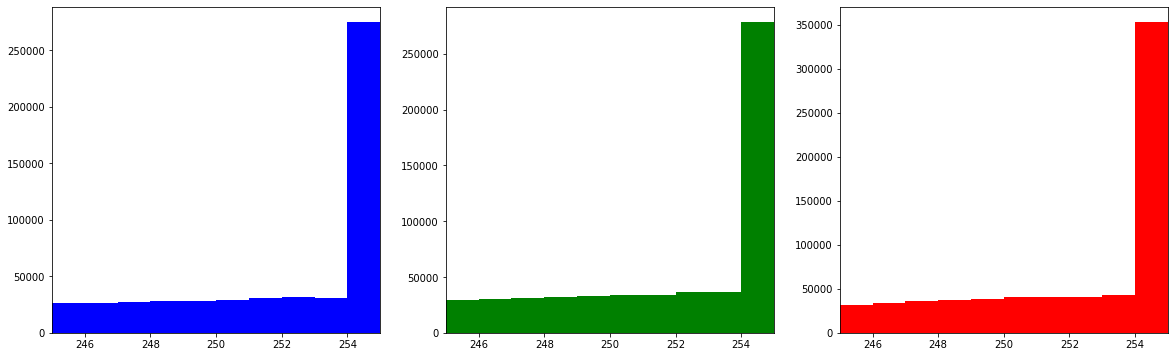

In [19]:
import matplotlib.pyplot as plt

i = 19

plt.figure(figsize=(10, 10))
plt.imshow(sample_data[i])
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(sample_data[i][:,:,0].flatten(), bins = None, range = (245, 255), color= 'blue')
plt.xlim((245, 255))
plt.subplot(1, 3, 2)
plt.hist(sample_data[i][:,:,1].flatten(), bins = None, range = (245, 255), color= 'green')
plt.xlim((245, 255))
plt.subplot(1, 3, 3)
plt.hist(sample_data[i][:,:,2].flatten(), bins = None, range = (245, 255), color= 'red')
plt.xlim((245, 255))
plt.show()

In [6]:
import cv2
import numpy as np

# 영상내 밝기가 높은 값을 찾고, 그 영역의 밝기 평균을 구함
def estimate_blankfield_white(image, ratio=0.01):
    rgb = image.copy()
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    for i in range(1, 256):
        hist[i][0] += hist[i - 1][0]
    N = hist[-1][0]
    k = round(N * ratio / 2)
    threshold = 255
    while hist[threshold][0] > N - k:
        threshold -= 1
    mask = (gray >= threshold).astype(np.uint8)
    white = np.array(cv2.mean(rgb, mask=mask)[:3], dtype=np.uint8)
    return white

# 영상내 밝기 높은 영역의 평균이 255가 되도록, 0~255로 변경
def correct_background(image, white=None, ratio=0.01, target=255):
    if white is None:
        white = estimate_blankfield_white(image, ratio=ratio)
    rgb = image.copy()
    divider = np.zeros_like(rgb)
    for ch in range(0, 3):
        divider[:, :, ch] = white[ch]  
    cv2.divide(rgb, divider, rgb, scale=target)
    return rgb

estimate_blankfield_white

In [219]:
rgb = img.copy()
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

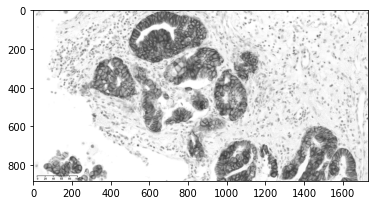

In [220]:
plt.imshow(gray, cmap='gray')

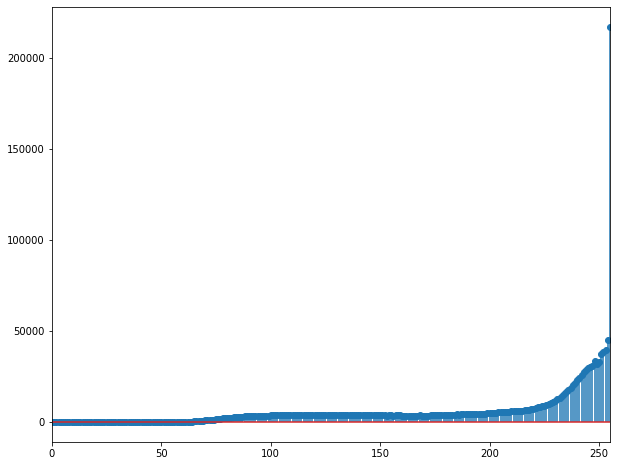

In [221]:
plt.figure(figsize = (10, 8))
plt.stem(hist)
plt.xlim((0, 255))
plt.show()

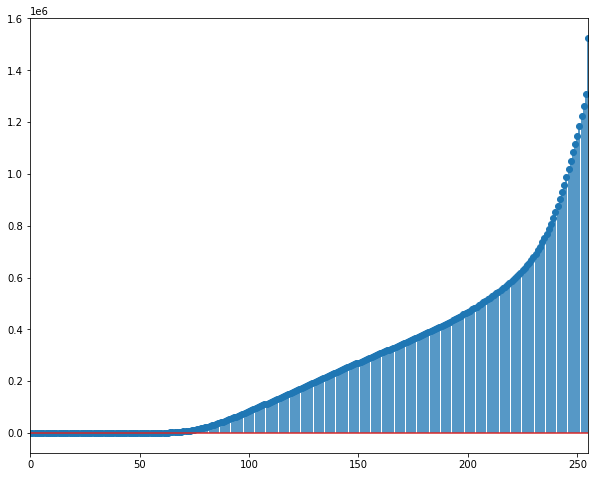

In [222]:
for i in range(1, 256):
    hist[i][0] += hist[i - 1][0]

plt.figure(figsize = (10, 8))
plt.stem(hist)
plt.xlim((0, 255))
plt.show()

In [226]:
ratio = 0.1

N = hist[-1][0]
k = round(N * ratio / 2)
threshold = 255

while hist[threshold][0] > N - k:
    threshold -= 1

threshold

254

In [74]:
N-k

1518231.0

254

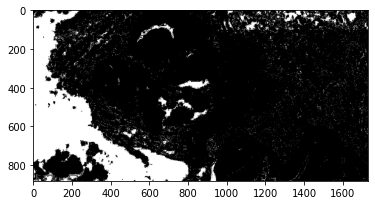

In [51]:
mask = (gray >= threshold).astype(np.uint8)

plt.imshow(mask, cmap='gray')

In [52]:
cv2.mean?

Docstring:
mean(src[, mask]) -> retval
.   @brief Calculates an average (mean) of array elements.
.   
.   The function cv::mean calculates the mean value M of array elements,
.   independently for each channel, and return it:
.   \f[\begin{array}{l} N =  \sum _{I: \; \texttt{mask} (I) \ne 0} 1 \\ M_c =  \left ( \sum _{I: \; \texttt{mask} (I) \ne 0}{ \texttt{mtx} (I)_c} \right )/N \end{array}\f]
.   When all the mask elements are 0's, the function returns Scalar::all(0)
.   @param src input array that should have from 1 to 4 channels so that the result can be stored in
.   Scalar_ .
.   @param mask optional operation mask.
.   @sa  countNonZero, meanStdDev, norm, minMaxLoc
Type:      builtin_function_or_method


In [55]:
cv2.mean(rgb, mask=mask)

(254.76102464332035, 254.86897840848403, 254.66806286717022, 0.0)

In [56]:
white = np.array(cv2.mean(rgb, mask=mask)[:3], dtype=np.uint8)

white

array([254, 254, 254], dtype=uint8)

correct_background

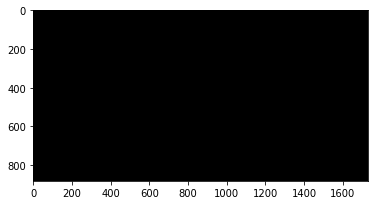

In [57]:
divider = np.zeros_like(rgb)

plt.imshow(divider)

In [78]:
for ch in range(0, 3):
    divider[:, :, ch] = white[ch]

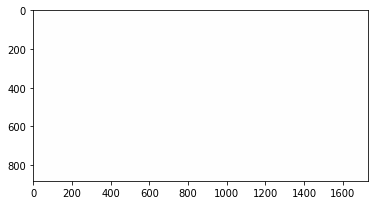

In [79]:
plt.imshow(divider)

In [90]:
rgb.shape

(882, 1730, 3)

In [106]:
img

array([[[230, 240, 239],
        [225, 235, 234],
        [223, 231, 233],
        ...,
        [220, 223, 240],
        [216, 220, 245],
        [216, 222, 248]],

       [[228, 238, 237],
        [226, 236, 237],
        [226, 234, 236],
        ...,
        [221, 223, 238],
        [219, 224, 243],
        [219, 226, 245]],

       [[225, 235, 236],
        [226, 236, 237],
        [225, 235, 237],
        ...,
        [227, 227, 237],
        [230, 234, 245],
        [229, 236, 246]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [239, 237, 238],
        [250, 250, 250],
        [244, 244, 246]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 251, 252],
        [255, 253, 254],
        [247, 245, 246]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 251, 252],
        [254, 252, 253],
        [246, 244, 245]]

In [84]:
rgb = img.copy()
target = 255

cv2.divide(rgb, divider, rgb, scale=target)

array([[[230, 240, 239],
        [225, 235, 234],
        [223, 231, 233],
        ...,
        [220, 223, 240],
        [216, 220, 245],
        [216, 222, 248]],

       [[228, 238, 237],
        [226, 236, 237],
        [226, 234, 236],
        ...,
        [221, 223, 238],
        [219, 224, 243],
        [219, 226, 245]],

       [[225, 235, 236],
        [226, 236, 237],
        [225, 235, 237],
        ...,
        [227, 227, 237],
        [230, 234, 245],
        [229, 236, 246]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [239, 237, 238],
        [250, 250, 250],
        [244, 244, 246]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 251, 252],
        [255, 253, 254],
        [247, 245, 246]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 251, 252],
        [254, 252, 253],
        [246, 244, 245]]

In [124]:
a = np.array([245], dtype='uint8')
b = np.array([230], dtype='uint8')

cv2.divide(a, b, a, scale=target)

array([255], dtype=uint8)

In [125]:
int(245/230)*255

255

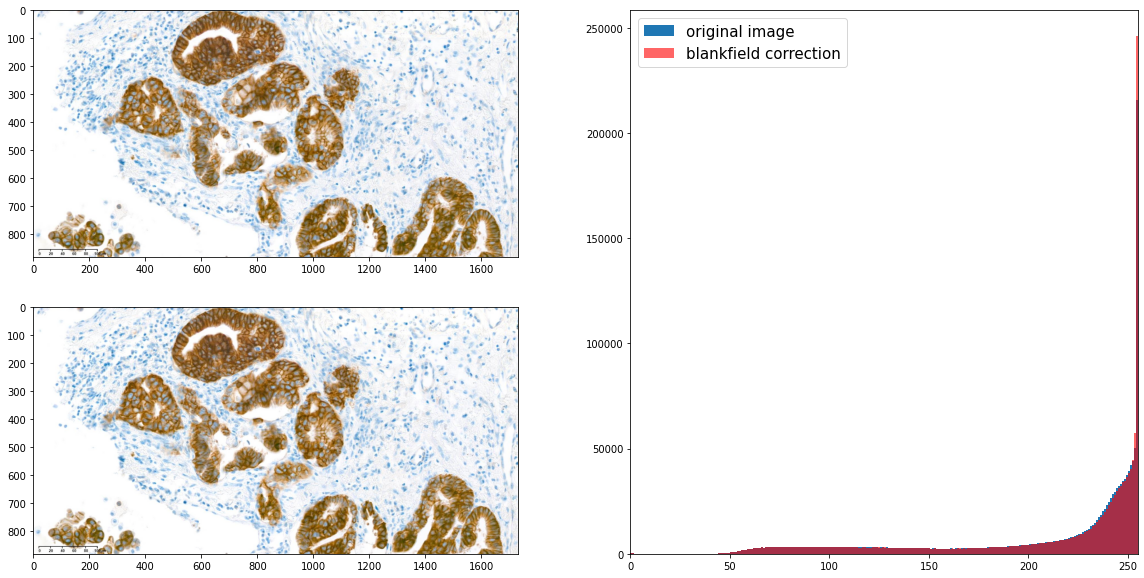

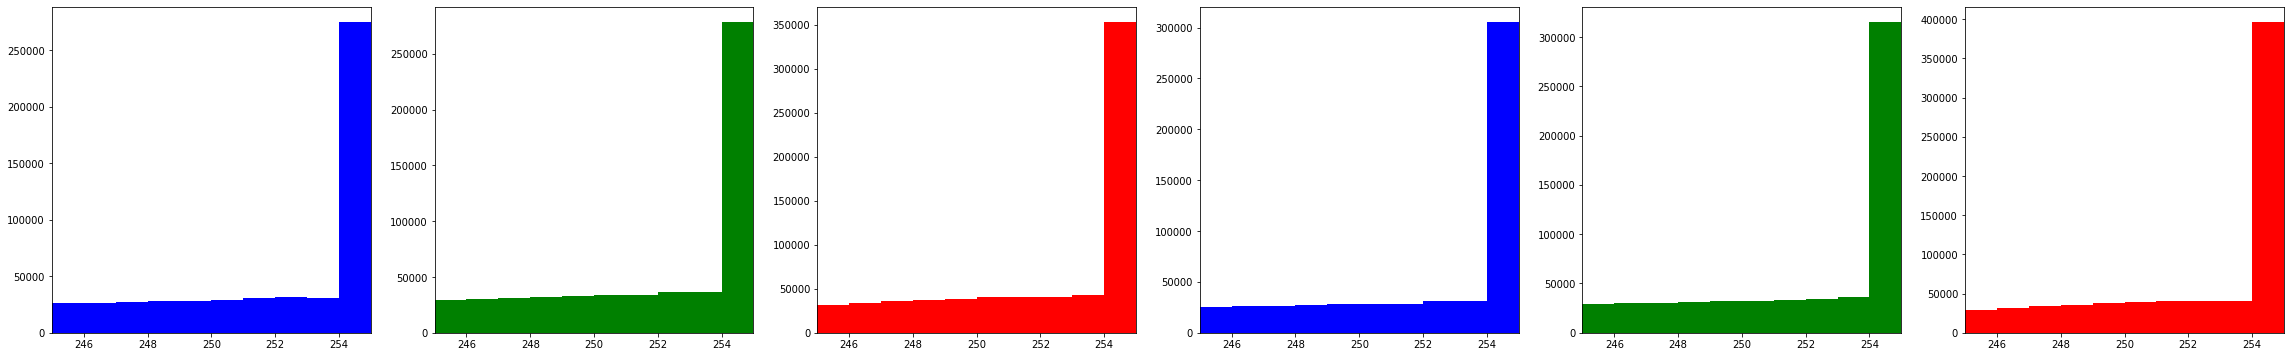

In [203]:
i = 19

img = sample_data[i]
img_after = correct_background(img, ratio = 0.01)

img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_after_g = cv2.cvtColor(img_after, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
# plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(img_after)
# plt.axis('off')
plt.subplot(2, 2, (2, 4))
plt.hist(img_g.ravel(), bins = 256, label = 'original image')
plt.hist(img_after_g.ravel(), bins = 256, color = 'red', alpha = 0.6, label = 'blankfield correction')
plt.xlim([0, 255])
plt.legend(loc = 2, fontsize = 15)
plt.show()


plt.figure(figsize=(40, 6))
plt.subplot(1, 6, 1)
plt.hist(img[:,:,0].flatten(), bins = None, range = (245, 255), color= 'blue')
plt.xlim((245, 255))
plt.subplot(1, 6, 2)
plt.hist(img[:,:,1].flatten(), bins = None, range = (245, 255), color= 'green')
plt.xlim((245, 255))
plt.subplot(1, 6, 3)
plt.hist(img[:,:,2].flatten(), bins = None, range = (245, 255), color= 'red')
plt.xlim((245, 255))
plt.subplot(1, 6, 4)
plt.hist(img_after[:,:,0].flatten(), bins = None, range = (245, 255), color= 'blue')
plt.xlim((245, 255))
plt.subplot(1, 6, 5)
plt.hist(img_after[:,:,1].flatten(), bins = None, range = (245, 255), color= 'green')
plt.xlim((245, 255))
plt.subplot(1, 6, 6)
plt.hist(img_after[:,:,2].flatten(), bins = None, range = (245, 255), color= 'red')
plt.xlim((245, 255))
plt.show()



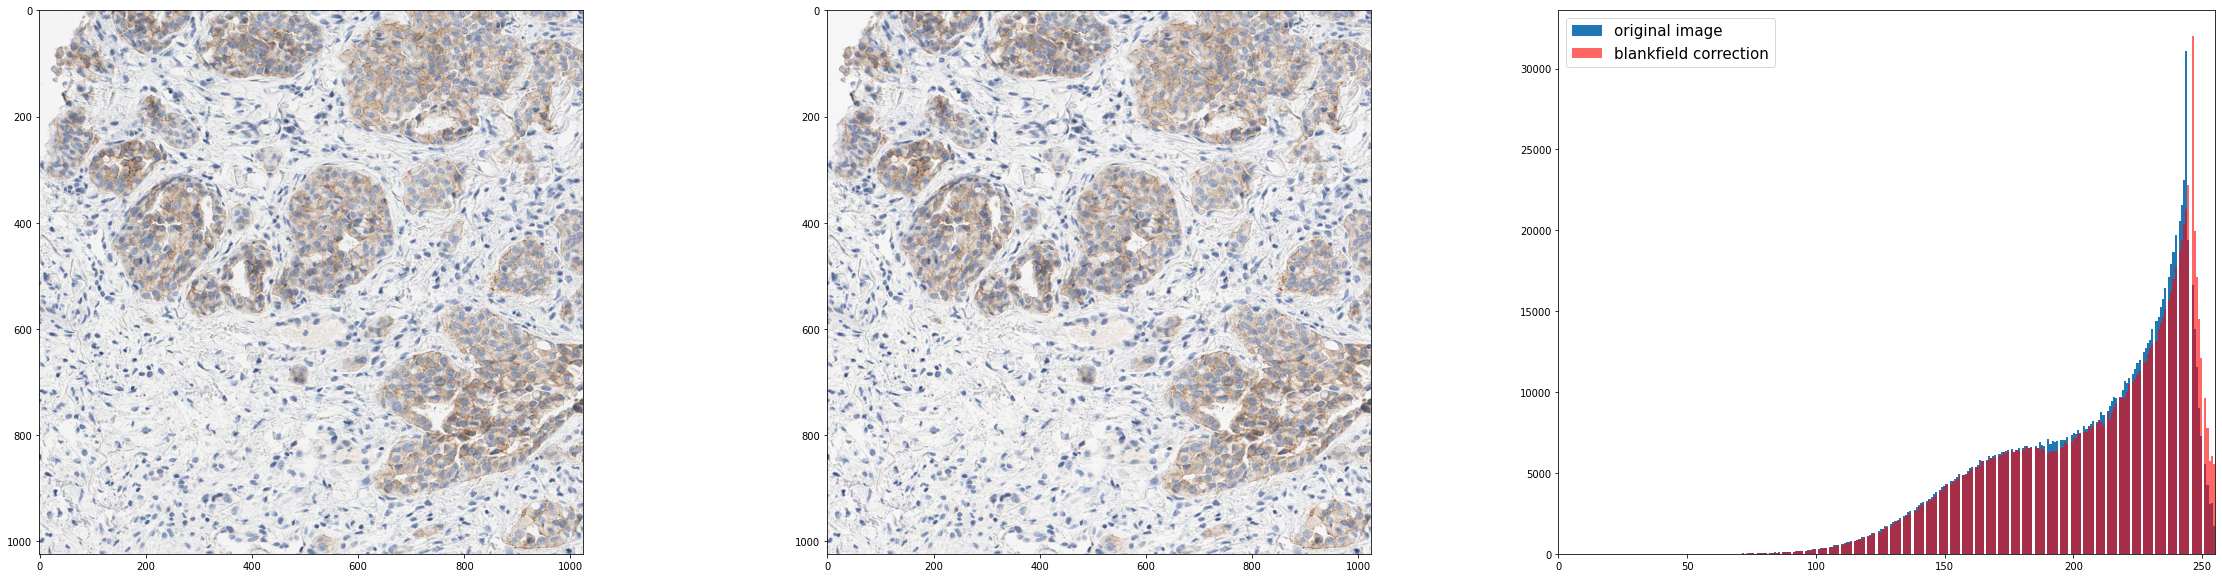

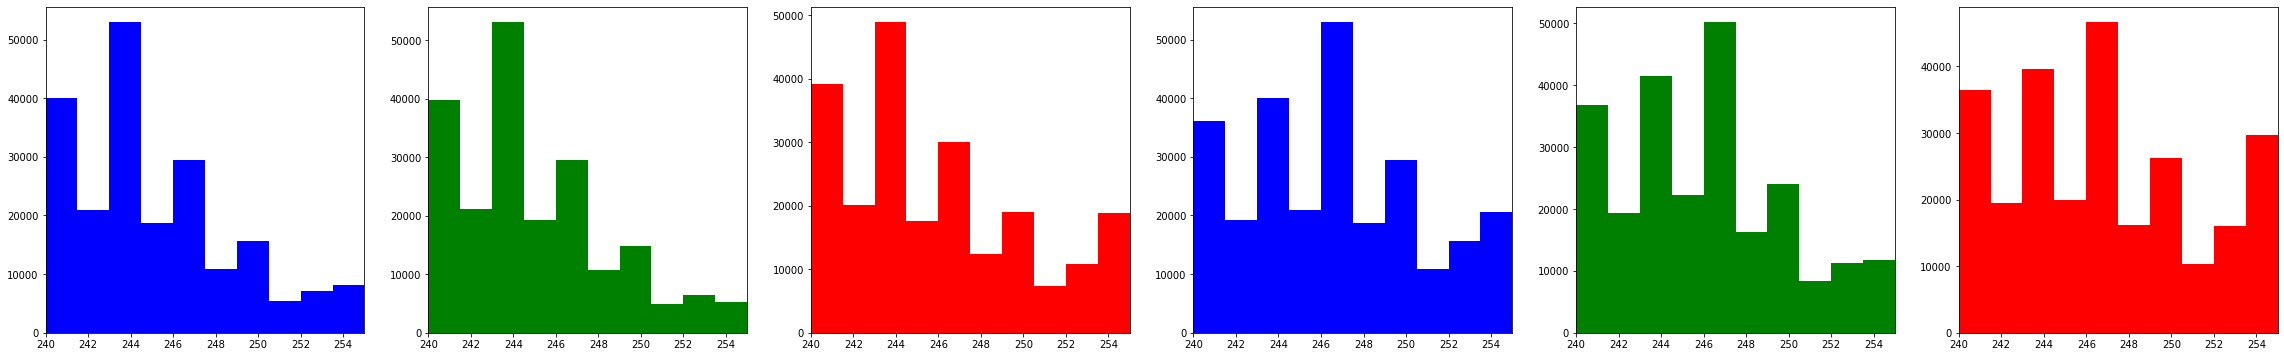

In [197]:
i = 3

img = samsung_data[i]
img_after = correct_background(img, ratio = 0.01)

img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_after_g = cv2.cvtColor(img_after, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
# plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_after)
# plt.axis('off')
plt.subplot(1, 3, 3)
plt.hist(img_g.ravel(), bins = 256, label = 'original image')
plt.hist(img_after_g.ravel(), bins = 256, color = 'red', alpha = 0.6, label = 'blankfield correction')
plt.xlim([0, 255])
plt.legend(loc = 2, fontsize = 15)
plt.show()


plt.figure(figsize=(40, 6))
plt.subplot(1, 6, 1)
plt.hist(img[:,:,0].flatten(), bins = None, range = (240, 255), color= 'blue')
plt.xlim((240, 255))
plt.subplot(1, 6, 2)
plt.hist(img[:,:,1].flatten(), bins = None, range = (240, 255), color= 'green')
plt.xlim((240, 255))
plt.subplot(1, 6, 3)
plt.hist(img[:,:,2].flatten(), bins = None, range = (240, 255), color= 'red')
plt.xlim((240, 255))
plt.subplot(1, 6, 4)
plt.hist(img_after[:,:,0].flatten(), bins = None, range = (240, 255), color= 'blue')
plt.xlim((240, 255))
plt.subplot(1, 6, 5)
plt.hist(img_after[:,:,1].flatten(), bins = None, range = (240, 255), color= 'green')
plt.xlim((240, 255))
plt.subplot(1, 6, 6)
plt.hist(img_after[:,:,2].flatten(), bins = None, range = (240, 255), color= 'red')
plt.xlim((240, 255))
plt.show()
